In [1]:
#=
Author:= Shreeda Bhat
License:= MIT 
UTF-8 =#

# Supress/Ignore the warnings
---------------------------------------


In [2]:
using IJulia
IJulia.installkernel("Julia nodeps", "--depwarn=no")

┌ Info: Installing Julia nodeps kernelspec in /home/shreedabhat/.local/share/jupyter/kernels/julia-nodeps-1.0
└ @ IJulia /home/shreedabhat/.julia/packages/IJulia/tOM8L/deps/kspec.jl:78


"/home/shreedabhat/.local/share/jupyter/kernels/julia-nodeps-1.0"

# Reading a CSV File 
------------------------

For reading CSV unlike in python, we use `DelimitedFiles` package

In [3]:
using DelimitedFiles

In [4]:
df = DelimitedFiles.readdlm("../Data/wikipediaEVDraw.csv",',')

54×9 Array{Any,2}:
 "25 Nov 2015"  28637  11314  3804  2536  …  4808     14122     3955   
 "18 Nov 2015"  28634  11314  3804  2536     4808     14122     3955   
 "11 Nov 2015"  28635  11314  3805  2536     4808     14122     3955   
 "4 Nov 2015"   28607  11314  3810  2536     4808     14089     3955   
 "25 Oct 2015"  28539  11298  3806  2535     4808     14061     3955   
 "18 Oct 2015"  28476  11298  3803  2535  …  4808     14001     3955   
 "11 Oct 2015"  28454  11297  3800  2534     4808     13982     3955   
 "27 Sep 2015"  28388  11296  3805  2533     4808     13911     3955   
 "20 Sep 2015"  28295  11295  3800  2532     4808     13823     3955   
 "13 Sep 2015"  28220  11291  3792  2530     4808     13756     3953   
 "6 Sep 2015"   28147  11291  3792  2530  …  4808     13683     3953   
 "30 Aug 2015"  28073  11290  3792  2529     4808     13609     3953   
 "16 Aug 2015"  27952  11284  3786  2524     4808     13494     3952   
 ⋮                                        ⋱  

In [2]:
using CSV 

┌ Info: Recompiling stale cache file /home/shreedabhat/.julia/compiled/v1.0/CSV/HHBkp.ji for CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1190


In [4]:
DataFrame = CSV.read("../Data/wikipediaEVDraw.csv",delimiter=",")

MethodError: MethodError: no method matching CSV.File(::CSV.Header{false,Parsers.Options{false,false,true,false,Missing,UInt8,Nothing},Array{UInt8,1}}; debug=false, typemap=Dict{Type,Type}(), delimiter=",")
Closest candidates are:
  CSV.File(::CSV.Header; startingbyteposition, endingbyteposition, limit, threaded, typemap, tasks, debug) at /home/shreedabhat/.julia/packages/CSV/MKemC/src/file.jl:229 got unsupported keyword argument "delimiter"
  CSV.File(::Any; header, normalizenames, datarow, skipto, footerskip, transpose, comment, use_mmap, ignoreemptylines, select, drop, missingstrings, missingstring, delim, ignorerepeated, quotechar, openquotechar, closequotechar, escapechar, dateformat, dateformats, decimal, truestrings, falsestrings, type, types, typemap, categorical, pool, lazystrings, strict, silencewarnings, debug, parsingdebug, kw...) at /home/shreedabhat/.julia/packages/CSV/MKemC/src/file.jl:216

# Let's use Datetime package in Julia 
-------------------------------------------------------------
it's simple just like python3 `import datetime` in julia `Using Dates`

In [5]:
DataFrame(Group=rand(["A", "B"], 20), Variable1=randn(20), Variable2=rand(20))

UndefVarError: UndefVarError: DataFrame not defined

In [7]:
using Dates

In [8]:
Dates.DateTime(df[1,1],"d u y")

2015-11-25T00:00:00

## We just need to convert the first column to datetime
---------------------------------------------------------

In [9]:
col1 = df[:,1]

54-element Array{Any,1}:
 "25 Nov 2015"
 "18 Nov 2015"
 "11 Nov 2015"
 "4 Nov 2015" 
 "25 Oct 2015"
 "18 Oct 2015"
 "11 Oct 2015"
 "27 Sep 2015"
 "20 Sep 2015"
 "13 Sep 2015"
 "6 Sep 2015" 
 "30 Aug 2015"
 "16 Aug 2015"
 ⋮            
 "9 Aug 2014" 
 "30 Jul 2014"
 "23 Jul 2014"
 "14 Jul 2014"
 "2 Jul 2014" 
 "17 Jun 2014"
 "27 May 2014"
 "12 May 2014"
 "1 May 2014" 
 "14 Apr 2014"
 "31 Mar 2014"
 "22 Mar 2014"

In [10]:
for i = 1:length(col1)
    col1[i] = Dates.DateTime(col1[i],"d u y")
end

In [11]:
col1

54-element Array{Any,1}:
 2015-11-25T00:00:00
 2015-11-18T00:00:00
 2015-11-11T00:00:00
 2015-11-04T00:00:00
 2015-10-25T00:00:00
 2015-10-18T00:00:00
 2015-10-11T00:00:00
 2015-09-27T00:00:00
 2015-09-20T00:00:00
 2015-09-13T00:00:00
 2015-09-06T00:00:00
 2015-08-30T00:00:00
 2015-08-16T00:00:00
 ⋮                  
 2014-08-09T00:00:00
 2014-07-30T00:00:00
 2014-07-23T00:00:00
 2014-07-14T00:00:00
 2014-07-02T00:00:00
 2014-06-17T00:00:00
 2014-05-27T00:00:00
 2014-05-12T00:00:00
 2014-05-01T00:00:00
 2014-04-14T00:00:00
 2014-03-31T00:00:00
 2014-03-22T00:00:00

# Let's convert the date and month to integers

----------------------------------------------------------------------------

datetime2rata converts total number of days

for ex: `27 July 2000` is a date. The datetime2rata calculates the total days from 1 january 0001 and returns total number of days, till now. 
but here the inital date is `22 March 2014`
so let's subtract `col1` with `col[54] i.e 22 March 2014`



In [12]:
using Dates
j(a) = Dates.datetime2rata(a) - Dates.datetime2rata(col1[54])
days = Array{Int64}(undef,54)
for i = 1:length(col1)
    days[i] = j(col1[i])
end

In [13]:
days

54-element Array{Int64,1}:
 613
 606
 599
 592
 582
 575
 568
 554
 547
 540
 533
 526
 512
   ⋮
 140
 130
 123
 114
 102
  87
  66
  51
  40
  23
   9
   0

In [14]:
df[:,1] = days
DelimitedFiles.writedlm("../Data/Converted_dataset.csv",df,',')

# Let's use plot package for simple Vizualization
--------------------------------------------------------------
when you first use plots, add this command in julia prompt or in notebook `Pkg.add("Plots")` 

Plots use GR Backend

more info at: http://docs.juliaplots.org/latest/



https://gr-framework.org/julia.html


X Axis - Days 

Y Axis - Total Ebola cases ( so let's split it )



In [15]:
using DelimitedFiles
new_df = DelimitedFiles.readdlm("../Data/Converted_dataset.csv",',')
days = new_df[:,1]
totalcase = new_df[:,2]

54-element Array{Any,1}:
 28637
 28634
 28635
 28607
 28539
 28476
 28454
 28388
 28295
 28220
 28147
 28073
 27952
     ⋮
  1835
  1437
  1201
   982
   779
   528
   309
   260
   239
   176
   130
    49

In [16]:
using Plots


In [17]:
gr()

Plots.GRBackend()

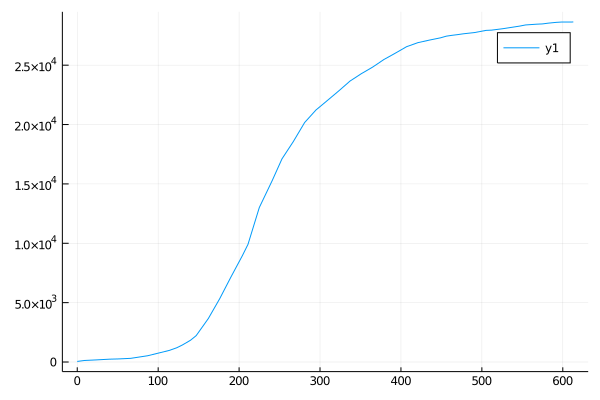

In [18]:
plot(days,totalcase)

## Let's tweak the plots
-------------------------------------------------------

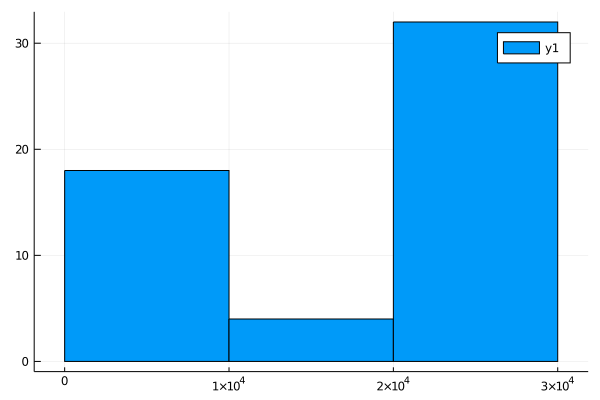

In [20]:
plot(days,totalcase, linetype =:histogram)

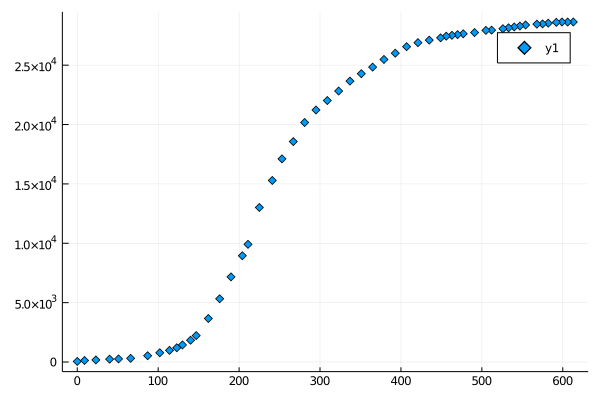

In [23]:
plot(days,totalcase, linetype =:scatter, marker =:diamond)

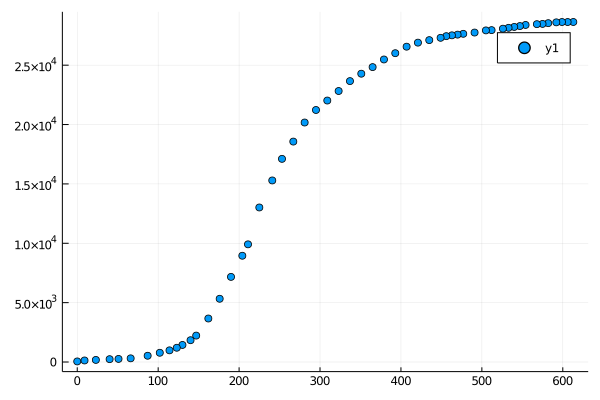

In [25]:
plot(days,totalcase, linetype =:scatter, marker =:dot)

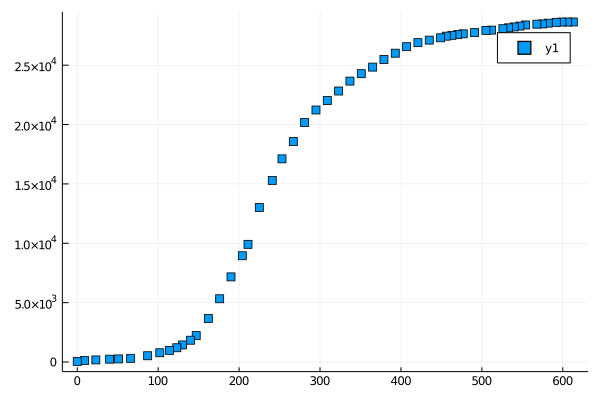

In [26]:
plot(days,totalcase, linetype =:scatter, marker =:square)

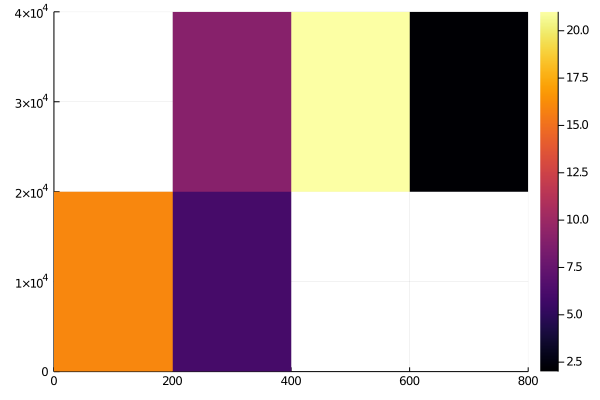

In [38]:
plot(days,totalcase, linetype =:histogram2d)

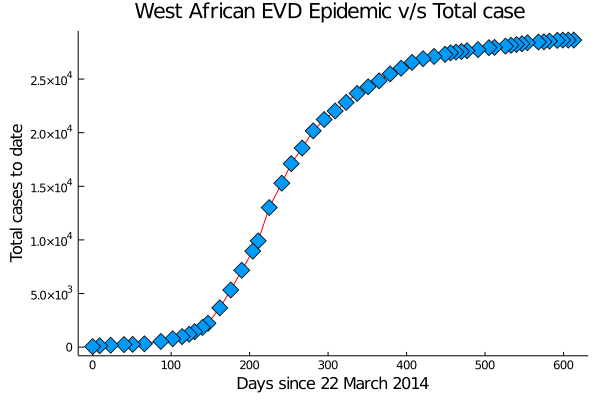

In [39]:
plot(days,totalcase,
    title = "West African EVD Epidemic v/s Total case ",
    xlabel = "Days since 22 March 2014",
    ylabel = "Total cases to date",
    marker = (:diamond,8),
    
    line = (:path,"red"),
    legend = false,
    grid = false
)

In [40]:
savefig("../Figures/WestAfricanEVD")

In [41]:
savefig("../Figures/WestAfricanEVD.pdf")

In [47]:
rows,columns = size(new_df)
for j = 1:columns
    for i = 1:rows
        if !isdigit(string(new_df[i,j])[1])
            new_df[i,j]=0
        end
    end
end

In [48]:
new_df[end-9:end,:]

10×9 Array{Any,2}:
 123  1201  672  427  319  249  129  525  224
 114   982  613  411  310  174  106  397  197
 102   779  481  412  305  115   75  252  101
  87   528  337  398  264   33   24   97   49
  66   309  202  281  186   12   11   16    5
  51   260  182  248  171   12   11    0    0
  40   239  160  226  149   13   11    0    0
  23   176  110  168  108    8    2    0    0
   9   130   82  122   80    8    2    0    0
   0    49   29   49   29    0    0    0    0

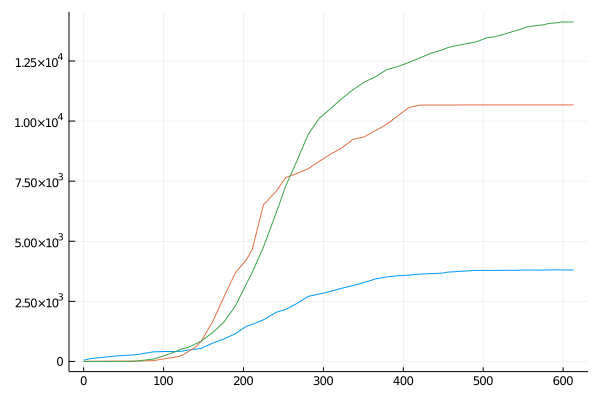

In [58]:
days = new_df[:,1]
casesbycountry = Array{Int64}(new_df[:,[4,6,8]])
using Plots
gr()
plot(days,casesbycountry)

┌ Warning: Skipped marker arg Symbol[:diamond :dots :stars].
└ @ Plots /home/shreedabhat/.julia/packages/Plots/E3MWZ/src/args.jl:814


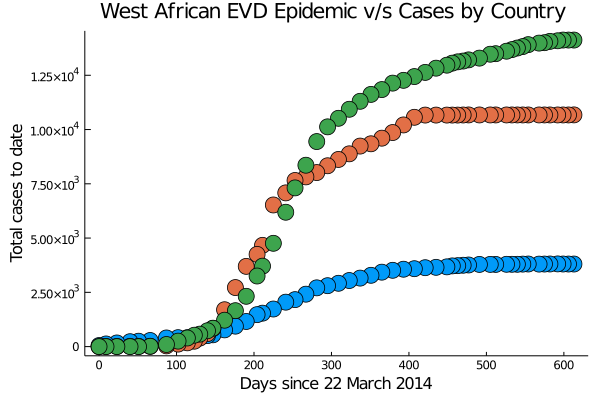

In [60]:
plot(days,casesbycountry,
    title = "West African EVD Epidemic v/s Cases by Country ",
    xlabel = "Days since 22 March 2014",
    ylabel = "Total cases to date",
    marker = ([:diamond :dots :stars],9),
    
    line = (:scatter),
    legend = false,
    grid = false
)

In [61]:
savefig("../Figures/multivizEVD")

In [62]:
savefig("../Figures/multivizEVD.pdf")